# First things first
*Is everyone familiar with Jupyter notebooks?*

In [3]:
y=[1,2,3]

In [4]:
x

[1, 2, 3]

In [5]:
y

[1, 2, 3]

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# pip install graphviz
# conda install python-graphviz

In [9]:
def hiddenFun(X):
    exp = 2;
    return X**exp + np.random.randn(X.shape[0])/10

In [10]:
matplotlib.rcParams.update({'font.size': 18,
                            'lines.linewidth' : 3,
                           'figure.figsize' : [15, 5],
                           'lines.markersize': 10})
pd.options.mode.chained_assignment = None


# Intro to Machine Learning

What does it mean to learn?  
- process where we take a series of observations 
- draw conclusions based on past experiences. 

As humans, we learn from our mistakes

For example, 
- if I take the later bus, 
- I'm late to work.  

Machine Learning -> we teach a computer to find patterns in data.  


Humans are really great at finding patterns, 
    - but relatively slow at looking through large amounts of data.  
    
Computers need to be trained to find the patterns, 
    - but they can process data of the sort of we have (csv files, images, etc) incredibly fast.


If we want to leverage machine learning, we need to teach computers to recognize patterns and leverage that ability to solve real world patterns.  

Lets start with a really simple 1d example.

X
[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.898

Text(0, 0.5, 'y')

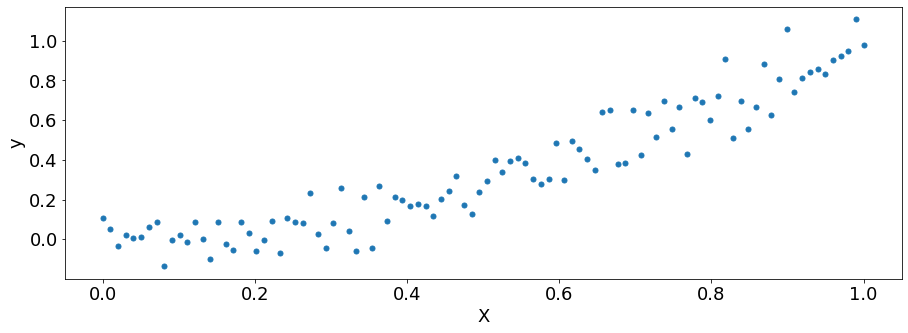

In [13]:
X = np.linspace(0,1,100)
y = hiddenFun(X)

print('X')
print(X)
print('y')
print(y)

plt.plot(X,y,'.')
plt.xlabel('X')
plt.ylabel('y')

So, 
- some data $X$ 
- some corresponding $y$.  

We want to model this data, *create a relationship $$f(X) \approx y $$* 
where $f$ will represent our model

We will now generate the predictive relationship by using one of the simplest possible methods, fitting a line to the data $$y=mx+c$$

In [14]:
from ipywidgets import interact, FloatSlider

def plotBestLine(m,c):
    plt.plot(X, y, '.', label='data');
    plt.plot(X, m*X + c, label = 'Model: {}x+{}'.format(m,c))
    plt.legend();

slider_m = FloatSlider(value=1, min=0, max=2, step=0.02, description='Gradient (m)')    
slider_c = FloatSlider(value=0, min=-0.5, max=0.5, step=0.02, description='Intercept (c)')    
interact(plotBestLine, m=slider_m, c=slider_c);

interactive(children=(FloatSlider(value=1.0, description='Gradient (m)', max=2.0, step=0.02), FloatSlider(valu…

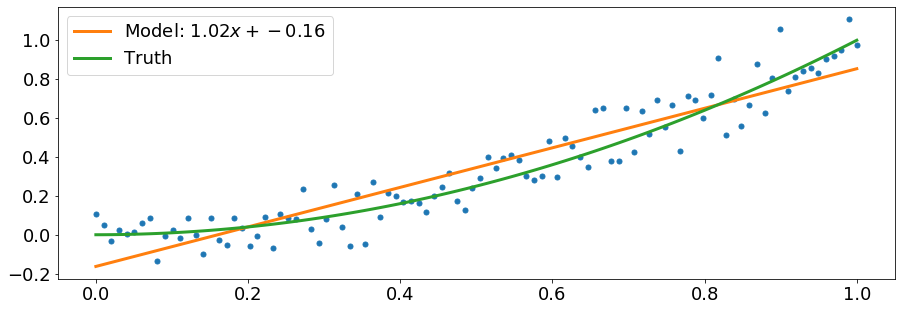

In [15]:
p = np.polyfit(X, y, 1)
z = np.poly1d(p)
plt.plot(X, y, '.')
plt.plot(X, z(X), label=r"Model: ${:.2f}x + {:.2f}$".format(*p))
plt.plot(X, X**2, label=r'Truth')
plt.legend();

We now have a model for this data, learned by the computer, namely given an $X$ value (or a bunch of values), we can predict the output.  This example opens up many questions:

1. How good is the model?
3. Is the model generalizable?
4. What does this model teach us about the data?

Lets start with question 3, which in many ways is the most important question.  For this simple model we can see that the $y$ vector of labels has a positive correlation with the features $X$.

## Why do we do Machine Learning?
Normally the goal of machine learning is two-fold

1. To understand the data we already have
2. Use this understanding to make predictions about unlabeled data


Machine Learning falls into two classes, 
- **supervised** learning : *learn a predictive relationship between **features** of our data and some sort of output **target** label* 
- **unsupervised** learning : *find trends in our features without using any target labels*

A human example for **Supervised Learning**
- borrowing books from a library on mathematics and geography. 
    - we learn what symbols, images, and words are associated with math,
    - maps are associated with geography. 

**Unsupervised task**
- borrow many books without knowing their subject.
    - some books contain similar images (maps) 
    - some books contain similar symbols (e.g. the Greek letters $\Sigma$ and $\pi$). 
    - We say the books containing maps are similar 
    - Different from the books containing Greek letters. 
    - **Crucially**, _we do not know what the books are about, only that they are similar or different_.

## Supervised Machine learning
Formally, the supervised machine problem can be stated as:
- given a matrix $X$,
of dimensions $n \times p$
- create a predictive relationship (or function) $f(X)$ where \begin{equation} f(X) \approx y \end{equation} 
    - $y$ is a vector of dimension $n$ called the **labels**.
    - $X$ is referred to as the **feature matrix** 

In [16]:
from sklearn.datasets import fetch_california_housing
dt_cali = fetch_california_housing()
df_cali = pd.DataFrame(dt_cali.data, columns=dt_cali.feature_names)
df_target = [1 if ii < 2 else 0  for ii in dt_cali['target'] ]

In [17]:
numRows = 10
df_sup = df_cali.head(numRows)
df_sup['-'] = '--------'
df_sup['MedianHouseValue'] = dt_cali['target'][:numRows]
# df_sup['AffordableHouse'] = df_target[:numRows]
print('Supervised Learning Dataset:')
df_sup

Supervised Learning Dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,-,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,--------,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,--------,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,--------,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,--------,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,--------,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,--------,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,--------,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,--------,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,--------,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,--------,2.611


The general goal of supervised learning is to then apply this model to unlabeled data where can build a feature matrix representative of the original.  This allows us to make predictions! 

In [18]:
df_sup = df_cali.head(numRows+5)[-5:]
df_sup['-'] = '--------'
df_sup['MedianHouseValue'] = '?'
# df_sup['AffordableHouse'] = '?'
df_sup

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,-,MedianHouseValue
10,3.2031,52.0,5.477612,1.079602,910.0,2.263682,37.85,-122.26,--------,?
11,3.2705,52.0,4.772480,1.024523,1504.0,2.049046,37.85,-122.26,--------,?
12,3.0750,52.0,5.322650,1.012821,1098.0,2.346154,37.85,-122.26,--------,?
13,2.6736,52.0,4.000000,1.097701,345.0,1.982759,37.84,-122.26,--------,?
14,1.9167,52.0,4.262903,1.009677,1212.0,1.954839,37.85,-122.26,--------,?


In [20]:
print('Unsupervised Learning Dataset:')
df_cali.head(numRows)

Unsupervised Learning Dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


## Machine Learning Difficulties
Machine learning is just a tool and is not a 'one-fits-all' solution.

Models can be heavily biased and thus not flexible enough to handle generalization.  Let us plot our original function over a larger range and use the model from before.

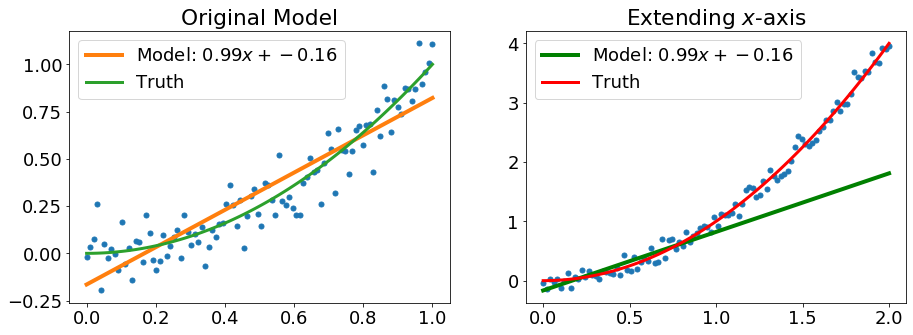

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2)
X = np.linspace(0, 1, 100)
y = X**2 + np.random.randn(X.shape[0])/10
p = np.polyfit(X, y, 1)
z = np.poly1d(p)
ax[0].plot(X, y, '.')
ax[0].plot(X, z(X), '-', linewidth=4, label= "Model: ${:.2f}x + {:.2f}$".format(*p))
ax[0].plot(X, X**2,'-', label=r'Truth')
ax[0].legend();
ax[0].set_title('Original Model');

X = np.linspace(0, 2, 100)
y = X**2 + np.random.randn(X.shape[0])/10
ax[1].plot(X, y, '.')
ax[1].plot(X, z(X), 'g', linewidth=4, label= "Model: ${:.2f}x + {:.2f}$".format(*p))
ax[1].plot(X, X**2,'-', color='r', label=r'Truth')
ax[1].legend();
ax[1].set_title('Extending $x$-axis');

The model works fairly well for the range over which initially considered our data, 
- but was crap beyond 1
- **does not generalize well** 

This is a general problem; 
- we should be careful that our training data contains well sampled data



**Machine learning finds patterns in data that it's already seen**, and it can't always make good predictions on data it hasn't. 

Lets try to fix this by adding more parameters to the model.

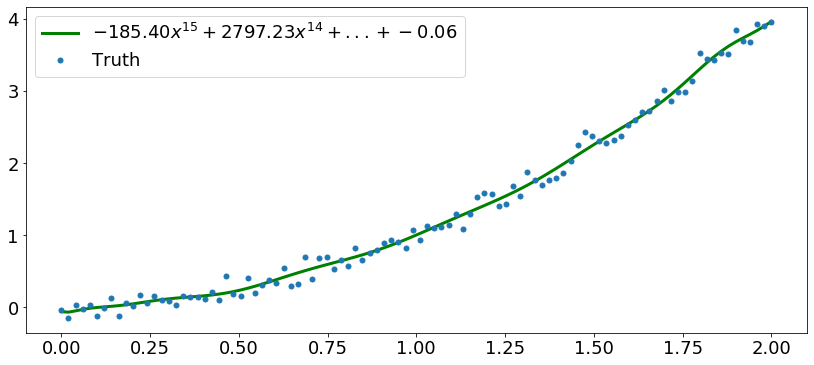

In [23]:
p = np.polyfit(X, y, 15)
z = np.poly1d(p)
plt.figure(figsize=[14, 6])
plt.plot(X, z(X), 'g', label=r"${:.2f}x^{{15}} + {:.2f}x^{{14}} + ... + {:.2f}$".format(*p[[0, 1, -1]]))
plt.plot(X, y,'.', label=r'Truth')
plt.legend();

Wow looks like a perfect fit!  Maybe too good?  It looks like the model is fitting little wiggles in the data which we know are not real (the actual data is derived from a simple exponent).  Lets try to generalize again.

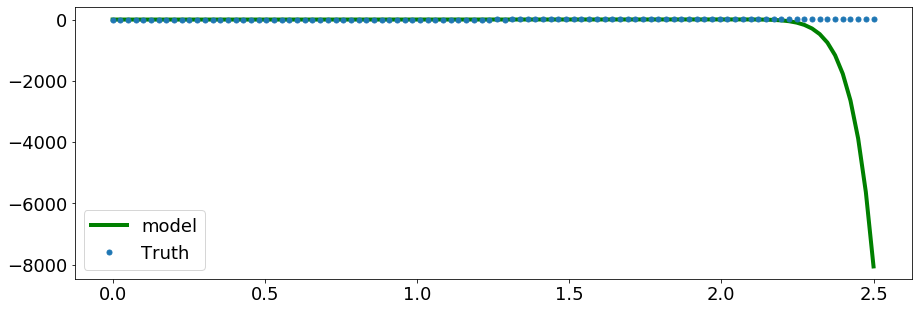

In [24]:
X = np.linspace(0, 2.5, 100)
y = X**2 + np.random.randn(X.shape[0])/10
plt.plot(X, z(X), 'g', linewidth=4, label=r"model")
plt.plot(X, y,'.', label=r'Truth')
plt.legend();

Wow again!  That is pretty bad.  This is an example of overfitting, where we have allowed the model too much flexibility and it has fit the noise in the data which is not generalizable.

<figure>
<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" style="width: 1500px;"/>
</figure>

We will learn more how to combat these issues, but the point is that we need to be careful when choose the model we want to use and the **hyperparameters** (in this case order of the polynomial) for the model.

# Intro to Scikit-learn

- `Scikit-learn` is the most popular Python package for machine learning. 
- It has a plethora of machine learning models 
    - a nice and intuitive interface.
- creating complicated machine learning workflows very easy

## Machine Learning models as classes

- `Scikit-learn` relies heavily on object-oriented programming principles
- machine learning algorithms as classes

In Python, the convention is that class names use CamelCase, the first letter of each word is capitalized. `Scikit-learn` adopts the convention, making it easy to distinguish what is a class.

In [26]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression(fit_intercept=True)

In the above code, we set `fit_intercept=False`. Here, `fit_intercept` is a **hyperparameter** of the Linear Regression model. Hyperparameters are model parameters that govern the learning process. In terms of hierarchy, they reside "above" the regular model parameters. They control what values the model parameters are equal to after undergoing training. They can be easily identified as they are the parameters that are set _prior_ to learning. In `scikit-learn`, hyperparameters are set when creating an instance of the class. The default values that `scikit-learn` uses are *usually* a good set of initial values but this is not always the case. It is important to understand the hyperparameters available and how they affect model performance.

`Scikit-learn` refers to machine learning algorithms as **estimators**. There are three different types of estimators: 
1. Classifiers, 
1. Regressors, and 
1. Transformers. 

Programmatically, `scikit-learn` has a base class called `BaseEstimator` that all estimators inherit. The models inherit an additional class, either `RegressorMixin`, `ClassifierMixin`, and `TransformerMixin`. The inheritance of the second class determines what type of estimator the model represents. We'll divide the estimators into two groups based up on their interface. These two groups are **predictors** and **transformers**.

Full information is available in the [documentation](https://scikit-learn.org/stable/index.html)

## Predictors: Classifiers and Regressors

As the name suggests, predictors are models that make predictions. There are two main methods.

* `fit(X, y)`: trains/fit the object to the feature matrix $X$ and label vector $y$.
* `predict(X)`: makes predictions on the passed data set $X$.

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()


In [36]:
lr.fit(X =df_cali, y = df_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred = lr.predict(df_cali)

In [40]:
from sklearn.linear_model import LinearRegression

# create model and train/fit

## use linear regression
## fit on (df_cali, df_target)
## predict label values on X: predict(df_cali)

print("Prediction : {}".format(y_pred))
print("     Shape of the prediction array: {}".format(y_pred.shape))
print("     Shape of the training set: {}".format(X.shape))

Prediction : [-0.10950739 -0.06874243  0.01494235 ...  1.26683201  1.21724446
  1.15979419]
     Shape of the prediction array: (20640,)
     Shape of the training set: (100,)


Note, the output of `predict(X)` is a NumPy array of one dimension. The array has the same size as the number of rows of the data that was passed to the `predict` method. 

Since we are using linear regression and our data has eight features, our model is

$$ y(X) = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \beta_8 x_8 + \beta_0. $$

The coefficients are stored in the fitted model as an object's attribute. `Scikit-learn` adopts a convention where all attributes that are determined/calculated _after_ fitting end in an underscore. The model coefficients and intercept are retrieved using the `coefs_` and the `intercept_` attributes, respectively.

In [43]:
lr.intercept_

18.652842751330454

In [44]:
print("β_0: {}".format(lr.intercept_))
for i in range(8):
    print("β_{}: {}".format(i+1, lr.coef_[i]))

β_0: 18.652842751330454
β_1: -0.13065164717054262
β_2: -0.002156137923778592
β_3: 0.0170910376956351
β_4: -0.13009965225138914
β_5: 1.4154616865890631e-06
β_6: 0.0014006775111010332
β_7: 0.191110057593925
β_8: 0.20302462879644653


If we wanted to know how well the model performs making predictions with a data set, we can use the `score(X, y)` method. It works by

1. Internally running `predict(X)` to produce predicted values.
1. Using the predicted values to evaluate the model compared to the true label values that were passed to the method.

The evaluation equation varies depending if the model is a regressor or classifier. For regression, it is the $R^2$ value while for classification, it is accuracy.

In [45]:
lr.score(df_cali, df_target)

0.40258111796536367

In [47]:
print("R^2: {:g}".format(lr.score(df_cali, df_target)))

R^2: 0.402581


We used a rather simple model, linear regression. What if we wanted to use a more complicated model? All we need to do is an easy substitution; there is minimum code rewrite as the models have the same interface. Of course, different models have different hyperparameters so we need to be careful when swapping out algorithms. Let's use a more complicated model and train it.

In [53]:
## use GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


gbr = GradientBoostingRegressor()
gbr.fit(df_cali, df_target)
y_pred = gbr.predict(df_cali)

print(y_pred)
print("R^2: {:g}".format(gbr.score(df_cali, df_target)))

[0.03463676 0.00571992 0.01631653 ... 1.0540743  1.01841935 1.04486858]
R^2: 0.643227


## Transformers

Transformers are models that process and transform a data set. These transformers are very useful because rarely is our data in a form to feed directly to a machine learning model for both training and predicting. All transformers have the same interface:

* `fit(X)`: trains/fits the object to the feature matrix $X$.
* `transform(X)`: applies the transformation on $X$ using any parameters learned
* `fit_transform(X)`: applies both `fit(X)` and then `transform(X)`.

Let's demonstrate transformers with `StandardScaler`, which scales each feature to have zero mean and unit variance. The transformed feature $x'_i$ is equal to
\begin{equation} x'_i = \frac{x_i - \mu_i}{\sigma_i} \end{equation}

In [57]:
df_cali

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_cali)


Xt = scaler.transform(df_cali)



# create data frame with results
stats = np.vstack((df_cali.mean(axis=0), df_cali.var(axis=0), Xt.mean(axis=0), Xt.var(axis=0))).T
feature_names = df_cali.columns
columns = ['unscaled mean', 'unscaled variance', 'scaled mean', 'scaled variance']

pd.DataFrame(stats, index=feature_names, columns=columns)

,unscaled mean,unscaled variance,scaled mean,scaled variance
MedInc,3.870671,3.609323e+00,6.609700e-17,1.0
HouseAge,28.639486,1.583963e+02,5.508083e-18,1.0
AveRooms,5.429000,6.121533e+00,6.609700e-17,1.0
AveBedrms,1.096675,2.245915e-01,-1.060306e-16,1.0
Population,1425.476744,1.282470e+06,-1.101617e-17,1.0
AveOccup,3.070655,1.078700e+02,3.442552e-18,1.0
Latitude,35.631861,4.562293e+00,-1.079584e-15,1.0
Longitude,-119.569704,4.014139e+00,-8.526513e-15,1.0


The data frame shows how our features have wildly different scales; the average population is over 1000 but the average room is slightly over 5. Now, our features each have zero mean and a variance of one.

# Supervised Machine Learning for a Classification Problem

## Dataset - Titanic Likelihood of Survival 
For this notebook, we will use the [Titanic Likelihood of Survival](https://www.kaggle.com/c/titanic/data) data. The data set contains the likelihood of survival of a person on board of the titanic.

In [58]:
df_titanic = pd.read_csv('./00_data/titanic.csv')

In [60]:
print(df_titanic.shape)
df_titanic.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"DiCaprio, Mr. Leonardo",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data dictionary**

| Variable	| Definition|	Key |
|---|---|---|
|survived |	Survival |	0 = No, 1 = Yes|
|pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex 	|Sex 	||
|Age |	Age in years 	||
|sibsp 	|# of siblings / spouses aboard the Titanic 	||
|parch 	|# of parents / children aboard the Titanic 	||
|ticket 	|Ticket number 	||
|fare 	|Passenger fare 	||
|cabin |	Cabin number 	||
|embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton|

**Variable Notes**
- *pclass* : A proxy for socio-economic status
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
- *age* : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- *sibsp* : The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- *parch* : The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

## Mathematics of supervised learning

For supervised ML, our model receives a vector of **features**, $X$, and maps it to some predicted label, $y$. In order to train our model, we will need many **observations** (i.e. measurements) and their associated labels. We can assemble these observations into a matrix.
$$ f(X_{ij}) \approx y_i $$

In [61]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"DiCaprio, Mr. Leonardo",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In the above dataframe, each column is a feature (i.e. a variable) and each row is an observation (i.e. a measurement). Said another way, things like **pclass**, **sex** and **age** are features. The column **survived** is the target labels.

## Metrics for Classification Problems
- In classification, we predict categorical labels. 
- In regression, we predict quantitative/numerical labels.

The critical difference is that we can't take a difference between the predicted and actual category in classification. 

We are trying to determine the model $f$ that can best describes the relationship

$$ y_j = f(X_j). $$

For classification, 
- $y_j$ can only take a finite set of values. 

If there are only two such values, 
- we are dealing with **binary** classification. 

Examples:
- **binary classification**: predicting whether it will rain or not.
- **multiclass classification**: image classification when we are trying to identify an image if it is of a person, a road sign, a car, etc.

### Accuracy

- A natural choice 
- number of observations  correctly classified over all observations. 

For example, 
- if your model properly identified 77 out of 100 images, 
    - you have an accuracy of 77%. 

Mathematically, it is simply

$$ \frac{\text{number of correct observations}}{\text{number of observations}}.$$

However, accuracy may not always be a good metric. 

Consider the case of disease detection:
    - only 10% of the observations have the disease. 
    
    
A "stupid" classifier that always predicts all as "No disease",

\begin{align}
\text{True Label} &: \left[0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1,1\right]\\
\text{Predicted } &: \left[0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0\right] \\
\\
\frac{\text{number of correct observations}}{\text{number of observations}}
&= \frac{90}{100} = 90\%
\end{align}

*Realistically, this model has learning "nothing"* as it fails to identify any person with the disease. 

We need a metric that will tell us how well our model performs for a particular class.

### Precision, Recall, f1-Score and Confustion Matrix
####  Precision & Recall
For the example of disease detection, 
- we are more interested in determining our model's performance with regards to the class representing having the disease. Let's call this class  **positive** and not having the disease as **negative**. 

We want to know:
- fraction of infected that were actually infected
- fraction of infected incorrectly identified
    - **precision** and **recall**. 

**Precision**: how "precise" our model was with regards to labeling observations as positive. 

**Recall**: model's ability to "catch" and properly label observations that are positive.

To summarize these 2 metrics, we construct a **confusion matrix**. This is a table summarizing the performance of the model by enumerating true and false positives and the true and false negatives.


|             *       | Positive Observation (1)   | Negative Observation (0)   |
|---------------------|:------------------------:|:-----------------------:|
| Positive Prediction (1) |     True Positive (TP)   | False Positive (FP)     |
| Negative Prediction (0) | False Negative (FN)      |     True Negative (TN)  |


Given the definitions used earlier, the equation for precision and recall are

$$ \text{precision} = \frac{\text{TP}}{TP + FP}$$
and
$$ \text{recall} = \frac{\text{TP}}{TP + FN}. $$

Note, the difference between the metrics is their denominator. 

*precision will be along the horizontal*

*recall will be vertical*

In our disease detection example, if our data had 10 observations as true disease, 

\begin{align}
\text{True Label} &: \left[1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1\right] \\
\text{Predicted}  & :\left[1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0\right] \\
\\
\text{12 observations were marked as infected} & \\
\text{precision} & = \frac{\text{TP}}{TP + FP} = \frac{8}{8+4} = 0.667\% \\
\\
\text{8 were correctly identified or "recalled"} &\\
\text{recall} &= \frac{\text{TP}}{TP + FN} = \frac{8}{8+2} = 0.80\%
\end{align}

If we had used the previous "simple" model that predicts the all as 0 class, the recall would be 0 and our precision would be undefined.

**Questions**
* For disease detection, is it better to have a higher precision or recall?
****
* Does our answer change if we need to have diagnosed patients undergo invasive and risky procedures?
****

#### f1-Score
In addition to precision and recall, there is that f1-score which is the harmonic mean of precision and recall. It is a nice metric to use when we don't have a preference over precision and recall. 
$$ \text{f1-score} = 2\times\frac{\text{precision}\times\text{recall}}{\text{precision}+\text{recall}} $$

#### Classification Report
We can easily calculate all these metrics using the `sklearn.metrics` module and to summarise all metrics, we will use the function `metrics.classification_report`. This will calculate the metrics for both scenarios of what class is considered positive or negative.

In [66]:
import numpy as np
from sklearn import metrics

# generate our results
y_pred = np.zeros(100, dtype=np.int32)
y_pred[:12] = 1
y = np.zeros(100)
y[:8] = 1
y[-2:] = 1

print('True Labels : ')
print([int(ii) for ii in y])
print('\nPredicted Labels :')
print([int(ii) for ii in y_pred])


## calculate precision_score(y,y_pred), recall_score(y, y_pred))), classification_report(y, y_pred))

metrics.precision_score(y,y_pred)
metrics.recall_score(y,y_pred)
print(metrics.classification_report(y,y_pred))

# print("\nPrecision: {:g}".format())
# print("Recall: {:g}".format())
# print("Classification Report:")
# print()

True Labels : 
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

Predicted Labels :
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        90
         1.0       0.67      0.80      0.73        10

    accuracy                           0.94       100
   macro avg       0.82      0.88      0.85       100
weighted avg       0.95      0.94      0.94       100



## Probabilistic Classification Models
Some classification models do not directly predict a class for an observation but instead reports a probability.

For example, 
- it might predict that there's a 75% patient has disease.

The natural choice is to assign the observation as 1 since the predicted probability is greater than 50%.

However, we don't have to stick to 50%; 
- we can adjust our **threshold** 
- classify observations as positive if our models predicts a greater than 90% probability. 

By increasing the threshold, 
- we will make our model only make positive predictions when it is very certain and confident. 
if we lower our threshold, 
- our model will more liberally assign positive labels. 

There is tradeoff between precision and recall that becomes more apparent with probabilistic models. Let's explore and visualize the tradeoff between precision and recall. We'll generate some data 

In [67]:
# generate data
np.random.seed(0)
y_proba = np.linspace(0, 1, 1000)
y_pred = (y_proba > 0.5).astype(np.int32)
y = np.random.binomial(1, y_proba)

print("accuracy: {}".format(metrics.accuracy_score(y, y_pred)))

accuracy: 0.75


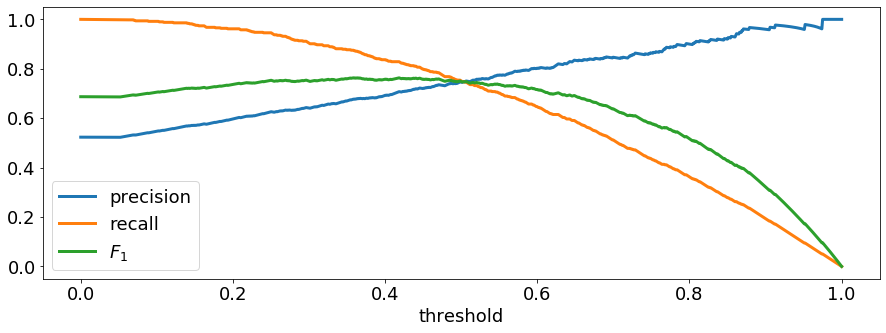

In [68]:
precision, recall, threshold = metrics.precision_recall_curve(y, y_proba)
f1_score = 2*precision*recall/(precision + recall)
threshold = np.hstack((0, threshold))

plt.plot(threshold, precision)
plt.plot(threshold, recall)
plt.plot(threshold, f1_score)
plt.xlabel('threshold')
plt.legend(['precision', 'recall', '$F_1$']);

In the above figure, 
- increasing the threshold led to higher precision but lower recall. 
- largest $F_1$ score was about 0.36 threshold

Any probabilistic model
- can achieve any arbitrary level of precision and recall by adjusting the threshold.


**we need a single metric that is not dependent on threshold**

### Area under the curve
The precision-recall curve illustrates the tradeoff for a particular classifier. While there will always be a tradeoff between these two metrics, ideally the tradeoff should not be severe. In other words, the model should not sacrifice a large amount of precision to slightly improve recall. We can visualize the degree of the tradeoff by plotting what is known as a precision-recall curve.

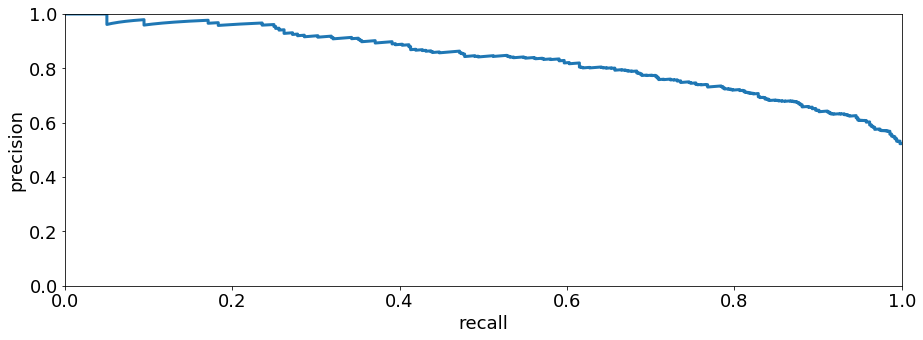

In [69]:
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.xlim([0, 1])
plt.ylim([0, 1]);

Geometrically, it is better to have a model with a larger area under the curve, **AUC**, of its precision-recall plot. 

In `scikit-learn`, the AUC can be calculated using the `metrics.auc` function. 

In addition to **AUC**, 
- **ROC-AUC**: receiver-operator curve (ROC) - true positive rate against the false negative rate.

In [70]:
print("Precision-Recall AUC: {}".format(metrics.auc(recall, precision)))
print("Receiver-Operator AUC: {}".format(metrics.roc_auc_score(y, y_proba)))

Precision-Recall AUC: 0.833677363943477
Receiver-Operator AUC: 0.834057379672299


In the example, the resulting model had similar values for AUC and ROC. In general, if your data is imbalanced (more observation of the negative class) or if you care more about false positives you should rely on AUC of the precision-recall curve. Note, the number of true negatives are not factored in calculating either precision or recall.

# Summary
1. What is ML
1. How to use `scikit-learn`
    - **predictors**: `fit(X)`, `predict(X)`
    - **transformers**: `fit(X)`, `transform(X)`,`fit_transform(X)`
1. What metrics to use for Supervised classification learning    
    - Accuracy,
    - Precision, Recall, f1-score
    - Confusion Matrix/Classification Report
    - Area under curve (AUC)